# I] Import

In [1]:
import pandas, numpy, math, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

In [2]:
# pip install matplotlib-venn

In [3]:
from matplotlib_venn import venn2

In [4]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

## functions & options


In [5]:
#define a function to split after the ".". The 1 is for how many word to have. if we have several dot. The [1] is what is after the dot, and [0] what is before
def split(L):
  return L.split(".",1)[0]

# II] Dataframe settings

## A) Isoform data

In [6]:
%%time
path = input_file_directory + "xenabrowser_brut_data/xena_surv_ATG7.tsv"
df_ori= pandas.read_csv(path, sep = "\t")
print(df_ori.shape)
df_ori.head()

(19131, 31)
Wall time: 104 ms


,sample,samples,_sample_type,_primary_site,ENSG00000197548.12,ENST00000451513.5,ENST00000435760.5,ENST00000451830.5,ENST00000460444.5,ENST00000470474.1,...,ENST00000434066.6,ENST00000478638.5,ENST00000461278.1,ENST00000460291.1,ENST00000467121.1,ENST00000414717.5,ENST00000427759.5,ENST00000446110.1,OS,OS.time
0,TARGET-20-PARUBT-40,TARGET-20-PARUBT-40,Recurrent Blood Derived Cancer - Peripheral Blood,White blood cell,4.401,-9.9660,0.3685,2.656,-0.7108,-1.0860,...,-9.9660,-9.966,-0.6193,-5.0120,-9.966,0.8568,-9.9660,-9.9660,NaN,NaN
1,TARGET-20-PATJHJ-40,TARGET-20-PATJHJ-40,Recurrent Blood Derived Cancer - Peripheral Blood,White blood cell,2.820,-9.9660,-0.1345,-1.595,-2.9320,-9.9660,...,-9.9660,-9.966,-9.9660,-3.3080,-9.966,-2.0530,-2.7270,-0.2328,NaN,NaN
2,TARGET-10-PASLZM-40,TARGET-10-PASLZM-40,Recurrent Blood Derived Cancer - Peripheral Blood,White blood cell,1.158,-9.9660,-2.6350,-1.994,-9.9660,-9.9660,...,-9.9660,-9.966,-9.9660,-3.6260,-9.966,-1.0860,-9.9660,-9.9660,NaN,NaN
3,TARGET-21-PATAIJ-42,TARGET-21-PATAIJ-42,Post treatment Blood Cancer - Blood,White blood cell,4.332,0.2642,1.0850,-1.086,-9.9660,-9.9660,...,-9.9660,-9.966,-9.9660,-1.5950,-9.966,0.3115,-0.6643,1.7230,NaN,NaN
4,TARGET-21-PASVJS-41,TARGET-21-PASVJS-41,Post treatment Blood Cancer - Bone Marrow,White blood cell,5.156,-9.9660,1.6280,-1.732,-2.8260,-0.6643,...,-0.1187,-9.966,-1.3550,0.4125,-9.966,0.2522,-9.9660,2.4310,NaN,NaN


In [7]:
# Column selection
df = df_ori[['sample',
            '_sample_type',
            '_primary_site',
             'OS', 'OS.time',
            'ENSG00000197548.12',
            'ENST00000354449.7', 
            'ENST00000354956.9',
            'ENST00000446450.6']]

# We have Adrenal Gland and Adrenal gland. I need to put "G".
df = df.assign(_primary_site=df['_primary_site'].str.title())

# Column rename
df = df.rename(columns = {'sample' : 'sample',
                    '_sample_type' : 'Sample_Type',
                    'OS.time' : 'OS_time',
                    '_primary_site' : 'Primary_Site',
                    'ENSG00000197548.12': 'ATG7',
                    'ENST00000354449.7': 'ATG7_1',
                    'ENST00000354956.9': 'ATG7_2',
                    'ENST00000446450.6': 'ATG7_3'})

# Calcul to have value from log2;  2**(ATG7(1))-0.001
df = df.assign(ATG7_total= pow(2,df['ATG7'])-0.001,
          ATG7_1tpm= pow(2,df['ATG7_1'])-0.001,
          ATG7_2tpm= pow(2,df['ATG7_2'])-0.001,
          ATG7_3tpm= pow(2,df['ATG7_3'])-0.001)

# Calcul to have log2+1 from value; 
df = df.assign(log2_p1_ATG7_total= numpy.log2(df['ATG7_total']+1),
               log2_p1_ATG7_1= numpy.log2(df['ATG7_1tpm']+1),
               log2_p1_ATG7_2= numpy.log2(df['ATG7_2tpm']+1))

# Calcul to see percentage of expression of the 3 isoforms of ATG7 
df = df.assign(ATG7_prot_tot= df['ATG7_1tpm'] + df['ATG7_2tpm'] + df['ATG7_3tpm'])

df = df.assign(ATG7_1perc= (df['ATG7_1tpm'] *100)/ df['ATG7_prot_tot'],
              ATG7_2perc= (df['ATG7_2tpm'] *100)/ df['ATG7_prot_tot'],
              ATG7_3perc= (df['ATG7_3tpm'] *100)/ df['ATG7_prot_tot'])                              

#Add columns, normalized on total
df = df.assign(ATG7_1norm= df['ATG7_1tpm']/df["ATG7_total"],
               ATG7_2norm= df['ATG7_2tpm']/df["ATG7_total"])                                   

df.head()

,sample,Sample_Type,Primary_Site,OS,OS_time,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_total,...,ATG7_3tpm,log2_p1_ATG7_total,log2_p1_ATG7_1,log2_p1_ATG7_2,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
0,TARGET-20-PARUBT-40,Recurrent Blood Derived Cancer - Peripheral Blood,White Blood Cell,NaN,NaN,4.401,1.3900,1.522,-1.7320,21.125765,...,3.000343e-01,4.467655,1.855905,1.952665,5.790710,45.241201,49.577495,5.181305,0.124009,0.135895
1,TARGET-20-PATJHJ-40,Recurrent Blood Derived Cancer - Peripheral Blood,White Blood Cell,NaN,NaN,2.820,1.1180,-1.086,-9.9660,7.060624,...,-1.495113e-07,3.010892,1.664236,0.555881,2.639524,82.191280,17.808726,-0.000006,0.307262,0.066576
2,TARGET-10-PASLZM-40,Recurrent Blood Derived Cancer - Peripheral Blood,White Blood Cell,NaN,NaN,1.158,0.0158,-3.171,-3.8160,2.230479,...,7.000183e-02,1.691748,1.007204,0.150597,1.190042,84.871949,9.245753,5.882299,0.452823,0.049329
3,TARGET-21-PATAIJ-42,Post treatment Blood Cancer - Blood,White Blood Cell,NaN,NaN,4.332,1.3450,1.975,-9.9660,20.139115,...,-1.495113e-07,4.401843,1.823465,2.301670,6.469584,39.249848,60.750154,-0.000002,0.126088,0.195157
4,TARGET-21-PASVJS-41,Post treatment Blood Cancer - Bone Marrow,White Blood Cell,NaN,NaN,5.156,1.8040,3.769,0.5069,35.653197,...,1.419994e+00,5.195867,2.166995,3.871026,18.542569,18.826249,73.515731,7.658019,0.097912,0.382342


In [8]:
#what kind of samples are the data ? 
df['Sample_Type'].value_counts()

Primary Tumor                                        9185
Normal Tissue                                        7429
Solid Tissue Normal                                   738
Cell Line                                             433
Metastatic                                            393
Primary Solid Tumor                                   286
Primary Blood Derived Cancer - Peripheral Blood       239
Primary Blood Derived Cancer - Bone Marrow            237
Recurrent Blood Derived Cancer - Bone Marrow          104
Recurrent Tumor                                        45
Recurrent Solid Tumor                                  13
Post treatment Blood Cancer - Bone Marrow              12
Additional - New Primary                               11
Recurrent Blood Derived Cancer - Peripheral Blood       3
Control Analyte                                         1
Post treatment Blood Cancer - Blood                     1
Additional Metastatic                                   1
Name: Sample_T

In [9]:
#what kind of samples are the data ? 
df['Primary_Site'].value_counts()

Brain                         1846
Lung                          1410
Breast                        1391
Skin                          1282
Kidney                        1193
Esophagus                      848
Prostate                       648
Colon                          639
Stomach                        624
Blood Vessel                   606
White Blood Cell               595
Thyroid Gland                  571
Head And Neck Region           564
Liver                          531
Adipose Tissue                 515
Ovary                          515
Blood                          444
Bladder                        435
Muscle                         396
Heart                          377
Pancreas                       350
Testis                         319
Cervix                         309
Thyroid                        279
Nerve                          278
Soft Tissue,Bone               264
Adrenal Gland                  205
Endometrium                    204
Paraganglia         

In [10]:
#Creation of two dataframe for blood only
##Normal tissue=Blood and Primary tumor=Bone Marrow & Peripheral Blood.
df_ATG7_Normal = df[(df['Primary_Site'] == 'Blood Vessel') | 
                      (df['Primary_Site'] == 'Blood') & (df['Sample_Type'] != 'Cell Line')]

df_ATG7_Primary = df[df['Sample_Type'].str.match('(Primary Blood Derived Cancer - Bone Marrow)|(Primary Blood Derived Cancer - Peripheral Blood)')]

print('normal_tissue' , len(df_ATG7_Normal))
print('primary_tumors' , len(df_ATG7_Primary))

normal_tissue 943
primary_tumors 476


In [11]:
df_ATG7_Primary.head(1)

,sample,Sample_Type,Primary_Site,OS,OS_time,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_total,...,ATG7_3tpm,log2_p1_ATG7_total,log2_p1_ATG7_1,log2_p1_ATG7_2,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
16,TARGET-21-PASLZE-09,Primary Blood Derived Cancer - Bone Marrow,White Blood Cell,NaN,NaN,5.59,2.23,3.584,0.7916,48.166896,...,1.729993,5.619615,2.508515,3.69944,18.41133,25.475291,65.128358,9.396351,0.097377,0.248947


In [12]:
# Column rename
df_ATG7_Primary = df_ATG7_Primary.rename(columns = {'Sample_Type' : 'Primary_Site',
                                                    'Primary_Site' : 'Sample_Type'})
#replace texts to have a better table
df_ATG7_Primary['Sample_Type'] = df_ATG7_Primary['Sample_Type'].str.replace('White Blood Cell', 'Primary Blood Derived Cancer')
df_ATG7_Primary['Primary_Site'] = df_ATG7_Primary['Primary_Site'].str.replace('Primary Blood Derived Cancer - ', '')

df_ATG7_Primary.head(2)

,sample,Primary_Site,Sample_Type,OS,OS_time,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_total,...,ATG7_3tpm,log2_p1_ATG7_total,log2_p1_ATG7_1,log2_p1_ATG7_2,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
16,TARGET-21-PASLZE-09,Bone Marrow,Primary Blood Derived Cancer,NaN,NaN,5.590,2.2300,3.584,0.7916,48.166896,...,1.729993,5.619615,2.508515,3.699440,18.411330,25.475291,65.128358,9.396351,0.097377,0.248947
17,TARGET-21-PANZLR-09,Bone Marrow,Primary Blood Derived Cancer,NaN,NaN,5.048,0.4125,3.216,0.6969,33.081584,...,1.620018,5.090920,1.220324,3.363321,12.241078,10.864977,75.900749,13.234275,0.040203,0.280853


In [13]:
# create df with only Normal and Primary 
df_ATG7_NormPrim = pandas.concat([df_ATG7_Normal, df_ATG7_Primary], axis=0)
df_ATG7_NormPrim.reset_index(drop=True, inplace=True)

In [14]:
df_ATG7_NormPrim['Sample_Type'].value_counts()

Normal Tissue                   943
Primary Blood Derived Cancer    476
Name: Sample_Type, dtype: int64

In [15]:
df_ATG7_NormPrim['Primary_Site'].value_counts()

Blood Vessel        606
Blood               337
Peripheral Blood    239
Bone Marrow         237
Name: Primary_Site, dtype: int64

## B) Whole gene expression

In [16]:
%%time
# DL data gene expression for Normal Tissue and Primary Tumors
input_file_directory_gene_expr = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 Python Analysis/gene_expr_preparation/'
path = output_file_directory + "dataframes_for_input/blood/"

directory = path + "ensembl_normal_blood_protcoding_expr.tsv"
normal_blood_protcoding= pandas.read_csv(directory, sep = "\t")
print("Normal tissue = Blood Vessel + Blood. Shape:", normal_blood_protcoding.shape)

directory = path + "ensembl_primary_blood_protcoding_expr.tsv"
primary_blood_protcoding= pandas.read_csv(directory, sep = "\t")
print("White Blood Cell, Primary Blood Derived Cancer = Peripheral Blood & Bone Marrow. Shape:", primary_blood_protcoding.shape)
primary_blood_protcoding.head(2)

Normal tissue = Blood Vessel + Blood. Shape: (943, 19383)
White Blood Cell, Primary Blood Derived Cancer = Peripheral Blood & Bone Marrow. Shape: (476, 19383)
Wall time: 20.1 s


,sample,ENSG00000198888,ENSG00000198763,ENSG00000198804,ENSG00000198712,ENSG00000228253,ENSG00000198899,ENSG00000198938,ENSG00000198840,ENSG00000212907,...,ENSG00000160678,ENSG00000160679,ENSG00000143553,ENSG00000214193,ENSG00000196182,ENSG00000181817,ENSG00000116885,ENSG00000116898,ENSG00000119535,ENSG00000142694
0,TARGET-10-PAMXHJ-09,13.4466,14.1354,14.8637,14.670,15.2483,14.1204,14.5576,11.6280,13.5521,...,5.4357,5.2028,5.1461,-2.2447,4.2706,4.0799,0.346,5.2631,6.2163,1.6093
1,TARGET-10-PAMXSP-09,14.3048,14.8800,14.6638,14.581,15.6861,14.5357,15.2548,12.5331,13.5130,...,7.3205,4.8885,2.6783,-1.3548,4.2699,2.2901,0.058,5.1306,7.0387,2.6464


In [17]:
#see how many duplicates in genes
print('normal shape:', normal_blood_protcoding.shape)
print('number of duplicated genes:', normal_blood_protcoding.columns.duplicated().sum())
print()
print('primary shape is:', primary_blood_protcoding.shape)
print('number of duplicated genes:', primary_blood_protcoding.columns.duplicated().sum())

normal shape: (943, 19383)
number of duplicated genes: 0

primary shape is: (476, 19383)
number of duplicated genes: 0


In [18]:
#Preparation of the global dataframe with ATG7
data = [[normal_blood_protcoding, df_ATG7_NormPrim], [primary_blood_protcoding, df_ATG7_NormPrim]]

df_final = []

for df in data:
    #Merge the two df to have ATG7 isoform expression + whole gene expression 
  df_merged = pandas.merge(df[1], df[0], on= 'sample')

  #delete the sample column and select column
  df_merged = df_merged.drop(df_merged.columns[8:22], axis=1)

  #save in list
  df_final.append(df_merged)

normal_blood_protcoding_atg7_expr = df_final[0]
primary_blood_protcoding_atg7_expr = df_final[1]

print(normal_blood_protcoding_atg7_expr.shape)
print(primary_blood_protcoding_atg7_expr.shape)
normal_blood_protcoding_atg7_expr.head()

(943, 19390)
(476, 19390)


,sample,Sample_Type,Primary_Site,OS,OS_time,ATG7,ATG7_1,ATG7_2,ENSG00000198888,ENSG00000198763,...,ENSG00000160678,ENSG00000160679,ENSG00000143553,ENSG00000214193,ENSG00000196182,ENSG00000181817,ENSG00000116885,ENSG00000116898,ENSG00000119535,ENSG00000142694
0,GTEX-R55D-1026-SM-3GAEQ,Normal Tissue,Blood Vessel,NaN,NaN,4.788,3.790,2.4220,13.2858,13.3810,...,0.6239,5.4585,5.6826,1.9712,4.9519,5.5534,1.5709,5.6826,3.7421,5.2200
1,GTEX-ZYVF-0826-SM-5E447,Normal Tissue,Blood Vessel,NaN,NaN,4.743,2.761,2.3050,11.7077,12.3614,...,0.6517,5.6082,5.4390,2.9090,6.1056,4.8778,2.6138,5.9540,2.6918,5.7173
2,GTEX-Q734-2226-SM-3GAD9,Normal Tissue,Blood Vessel,NaN,NaN,4.598,3.530,0.7999,12.3145,12.6877,...,1.4120,6.1310,5.7010,1.1382,5.5802,5.2661,2.4753,5.9381,4.8450,4.8390
3,GTEX-1399S-0926-SM-5PNVQ,Normal Tissue,Blood Vessel,NaN,NaN,4.584,3.650,1.4120,12.2836,12.4268,...,3.4971,5.0370,5.1473,2.6670,4.8968,6.1098,1.5854,5.7960,4.8177,7.1084
4,GTEX-OXRO-1926-SM-2S1O3,Normal Tissue,Blood Vessel,NaN,NaN,4.574,3.203,1.6000,13.3234,13.3712,...,0.4552,5.6941,4.9303,1.8160,5.5475,4.9199,2.3788,5.1065,2.4144,4.5844


In [57]:
normal_sample_labels

,sample,Sample_Type,Primary_Site
0,GTEX-R55D-1026-SM-3GAEQ,Normal Tissue,Blood Vessel
1,GTEX-ZYVF-0826-SM-5E447,Normal Tissue,Blood Vessel
2,GTEX-Q734-2226-SM-3GAD9,Normal Tissue,Blood Vessel
3,GTEX-1399S-0926-SM-5PNVQ,Normal Tissue,Blood Vessel
4,GTEX-OXRO-1926-SM-2S1O3,Normal Tissue,Blood Vessel
...,...,...,...
938,GTEX-11PRG-0005-SM-5NQ6X,Normal Tissue,Blood
939,GTEX-147F4-0006-SM-5O99T,Normal Tissue,Blood
940,GTEX-NPJ8-0007-SM-26GMF,Normal Tissue,Blood
941,GTEX-QMR6-0005-SM-32PKY,Normal Tissue,Blood


In [19]:
#select samples label to have the good samples for the complete ATG7 dataframe
normal_sample_labels = normal_blood_protcoding_atg7_expr.iloc[:,0:3]
normal_blood_sample_labels = normal_sample_labels[normal_sample_labels['Primary_Site'] == 'Blood']
normal_vessblood_sample_labels = normal_sample_labels[normal_sample_labels['Primary_Site'] == 'Blood Vessel']

primary_sample_labels = primary_blood_protcoding_atg7_expr.iloc[:,0:3]                  
primary_periph_sample_labels = primary_sample_labels[primary_sample_labels['Primary_Site'] == 'Peripheral Blood']
primary_bonemarrow_sample_labels = primary_sample_labels[primary_sample_labels['Primary_Site'] == 'Bone Marrow']

primary_bonemarrow_sample_labels['Primary_Site'].value_counts()

Bone Marrow    237
Name: Primary_Site, dtype: int64

In [20]:
#subset
df_ATG7_Normal_blood = normal_blood_sample_labels.merge(df_ATG7_NormPrim)
df_ATG7_Normal_Vessblood = normal_vessblood_sample_labels.merge(df_ATG7_NormPrim)
df_ATG7_Primary_periph = primary_periph_sample_labels.merge(df_ATG7_NormPrim)
df_ATG7_Primary_bonemarrow = primary_bonemarrow_sample_labels.merge(df_ATG7_NormPrim)

print("Blood:", df_ATG7_Normal_blood.shape)
print("Vessblood:",df_ATG7_Normal_Vessblood.shape)
print("Periph:",df_ATG7_Primary_periph.shape)
print("Bone_Marrow:",df_ATG7_Primary_bonemarrow.shape)

df_ATG7_Primary_periph.head(2)

Blood: (337, 22)
Vessblood: (606, 22)
Periph: (239, 22)
Bone_Marrow: (237, 22)


,sample,Sample_Type,Primary_Site,OS,OS_time,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_total,...,ATG7_3tpm,log2_p1_ATG7_total,log2_p1_ATG7_1,log2_p1_ATG7_2,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
0,TCGA-AB-2916-03,Primary Blood Derived Cancer,Peripheral Blood,0.0,882.0,6.916,3.553,4.103,2.095,120.759096,...,4.271262,6.927886,3.670848,4.184524,33.190400,35.359823,51.77121,12.868967,0.097186,0.142292
1,TCGA-AB-2837-03,Primary Blood Derived Cancer,Peripheral Blood,1.0,0.0,6.886,4.168,4.308,1.516,118.273889,...,2.858970,6.898134,4.246028,4.378986,40.640813,44.228934,48.73634,7.034726,0.151978,0.167466


In [130]:
#remove Survival information
all_data = [df_ATG7_Normal_blood, df_ATG7_Normal_Vessblood,
            df_ATG7_Primary_periph, df_ATG7_Primary_bonemarrow]

for df in all_data:
    df.drop(df.columns[[3, 4]], axis = 1, inplace = True)

#create dataframe with all the blood samples together
df_all_blood = pandas.concat([df_ATG7_Normal_blood, df_ATG7_Normal_Vessblood,
                        df_ATG7_Primary_periph, df_ATG7_Primary_bonemarrow], axis=0)

#reset index
df_all_blood.reset_index(drop=True, inplace=True)
print(df_all_blood.shape)
df_all_blood.head()

(1419, 20)


,sample,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_total,ATG7_1tpm,ATG7_2tpm,ATG7_3tpm,log2_p1_ATG7_total,log2_p1_ATG7_1,log2_p1_ATG7_2,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
0,GTEX-QCQG-0006-SM-2S1OW,Normal Tissue,Blood,5.728,2.744,3.822,2.486,53.001922,6.698252,14.141840,5.601225,5.754939,2.944531,3.920469,26.441318,25.332519,53.483872,21.183609,0.126378,0.266818
1,GTEX-PWN1-0006-SM-2S1NG,Normal Tissue,Blood,5.680,2.964,3.870,1.665,51.267472,7.801844,14.620303,3.170137,5.707841,3.137806,3.965351,25.592283,30.485141,57.127779,12.387080,0.152179,0.285177
2,GTEX-11NSD-0005-SM-5LZZ5,Normal Tissue,Blood,5.410,2.431,3.305,1.688,42.516946,5.391671,9.882349,3.221097,5.443505,2.676193,3.443918,18.495117,29.151861,53.432206,17.415933,0.126812,0.232433
3,GTEX-ZP4G-0006-SM-4WWE6,Normal Tissue,Blood,5.390,3.022,3.720,1.799,41.931589,8.121929,13.176456,3.478789,5.423968,3.189339,3.825425,24.777174,32.779883,53.179818,14.040299,0.193695,0.314237
4,GTEX-1497J-0005-SM-5NQBD,Normal Tissue,Blood,5.381,2.936,3.685,1.345,41.670814,7.651865,12.860616,2.539302,5.415178,3.113011,3.792919,23.051783,33.194245,55.790113,11.015642,0.183626,0.308624


# III] ATG7 characterization in blood

## A) ATG7 expression in the different tissue

In [24]:
df_all_blood

##select columns
df_sampletype = df_all_blood[['Primary_Site',
                    'ATG7_total',             
                    'ATG7_1perc',
                    'ATG7_2perc',
                    'ATG7_3perc']]

##Column rename
df_sampletype = df_sampletype.rename(columns = {'Primary_Site' : 'Primary Site', 
                                                'ATG7_total': 'tpm ATG7',
                                                'ATG7_1perc' : "% ATG7(1)",
                                                'ATG7_2perc' : "% ATG7(2)",
                                                'ATG7_3perc' : "% ATG7(3)"})

##Groupby to have merge of all the primary site 
df_sampletype = df_sampletype.groupby('Primary Site').agg(numpy.mean)
df_sampletype = df_sampletype.round(2)

##save_df in a list
df_sampletype.head()

,tpm ATG7,% ATG7(1),% ATG7(2),% ATG7(3)
Primary Site,,,,
Blood,13.52,39.14,47.83,13.04
Blood Vessel,14.23,85.50,12.12,2.38
Bone Marrow,8.05,77.36,19.56,3.09
Peripheral Blood,36.78,65.60,30.67,3.74


findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


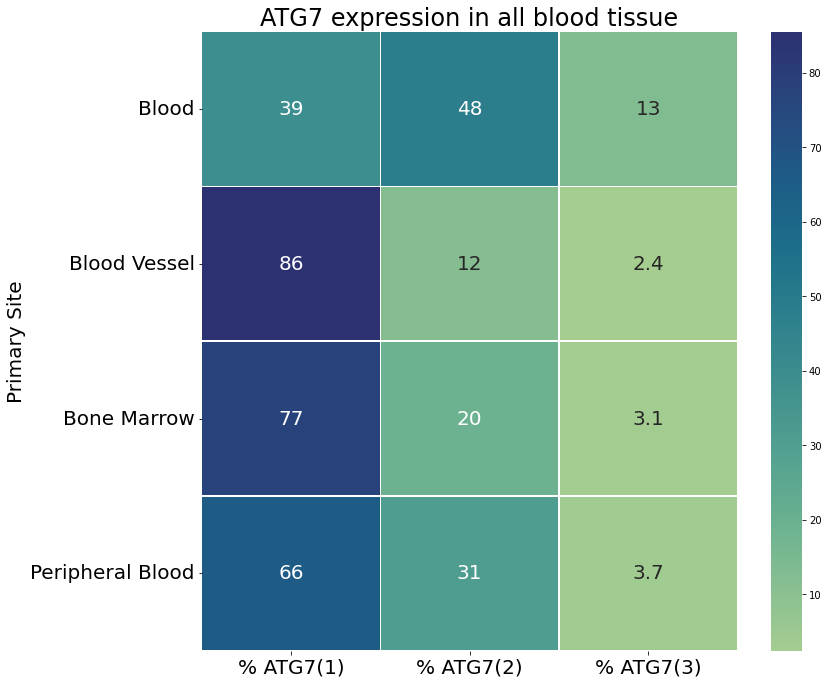

<Figure size 864x576 with 0 Axes>

In [25]:
HeatMap_df = df_sampletype[['% ATG7(1)', '% ATG7(2)', '% ATG7(3)']]
heatmap = seaborn.heatmap(HeatMap_df, annot=True, cmap="crest", linewidths=.5)
plt.title('ATG7 expression in all blood tissue')
plt.yticks(fontsize=20)
plt.subplots_adjust(top=1.2)
plt.yticks(rotation = 0)
path = 'ATG7/blood/figs_ATG7_characterisation/'
name = 'heatmap_tissue_blod'
plt.savefig(output_file_directory+path+name+'.svg')
plt.show()
plt.clf()

   Primary Site  tpm ATG7
0         Blood     13.52
1  Blood Vessel     14.23
2   Bone Marrow      8.05
min: 8.05
max: 36.78


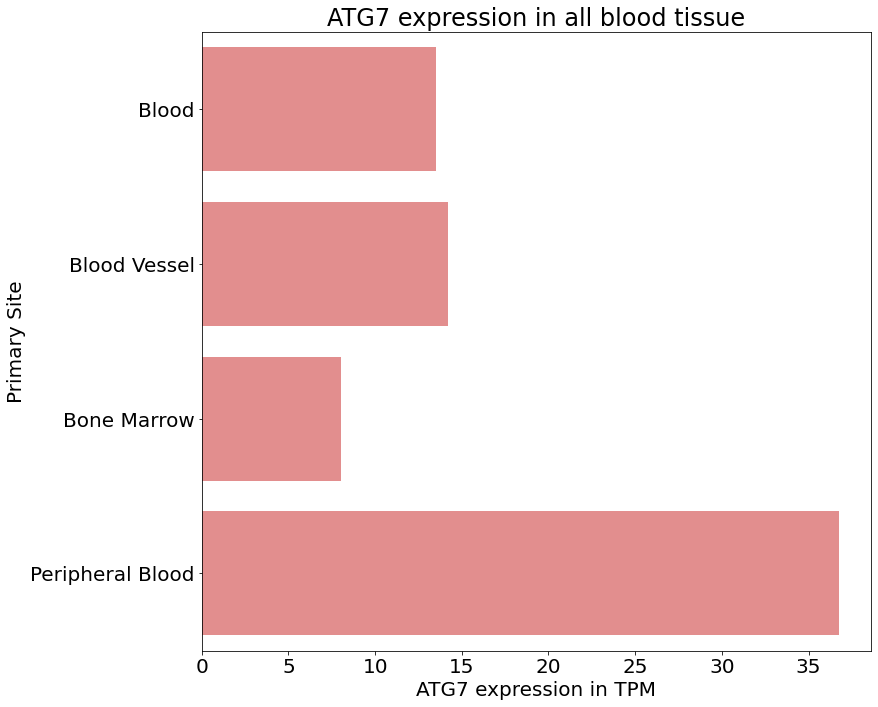

In [26]:
df = df_sampletype

hist_df = df.reset_index()
hist_df = hist_df[['Primary Site','tpm ATG7']]
print(hist_df.head(3))
print("min:", hist_df['tpm ATG7'].min())
print("max:", hist_df['tpm ATG7'].max())

# Seaborn
seaborn.barplot(data = hist_df, x =  'tpm ATG7', y = 'Primary Site', color = 'lightcoral')
plt.title('ATG7 expression in all blood tissue')
plt.xlabel('ATG7 expression in TPM')
plt.subplots_adjust(top=1.2)
plt.yticks(fontsize=20)

path = 'ATG7/blood/figs_ATG7_characterisation/'
name = 'histo_organs_blood'
plt.savefig(output_file_directory+path+name+'.svg')

# B) Distribution

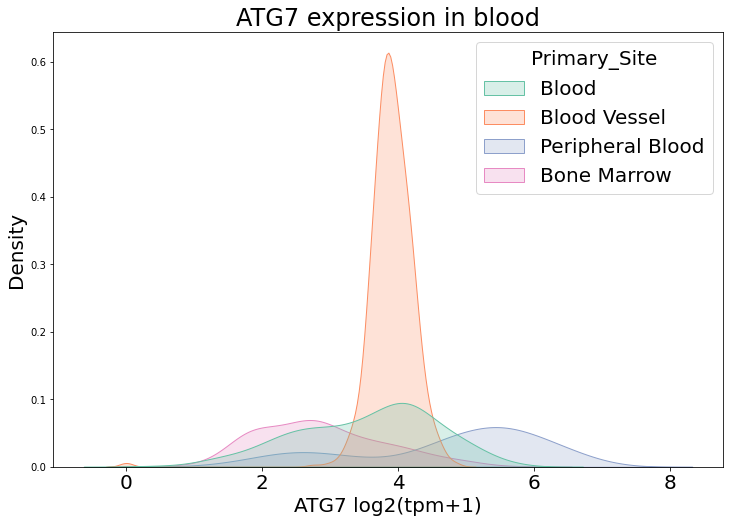

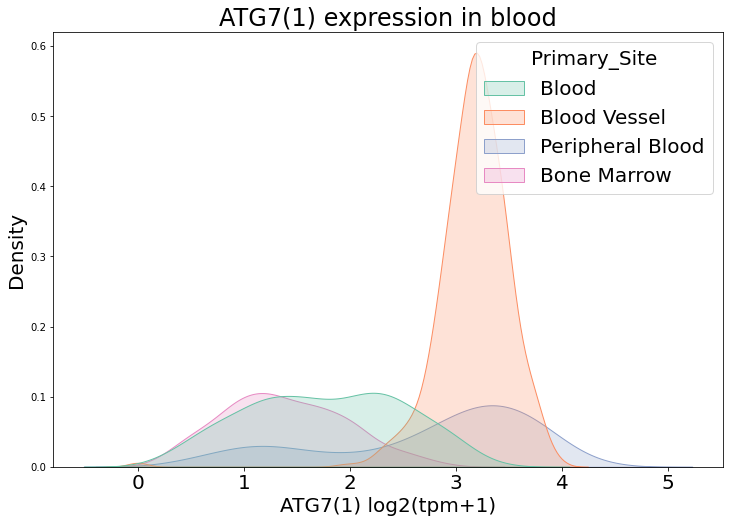

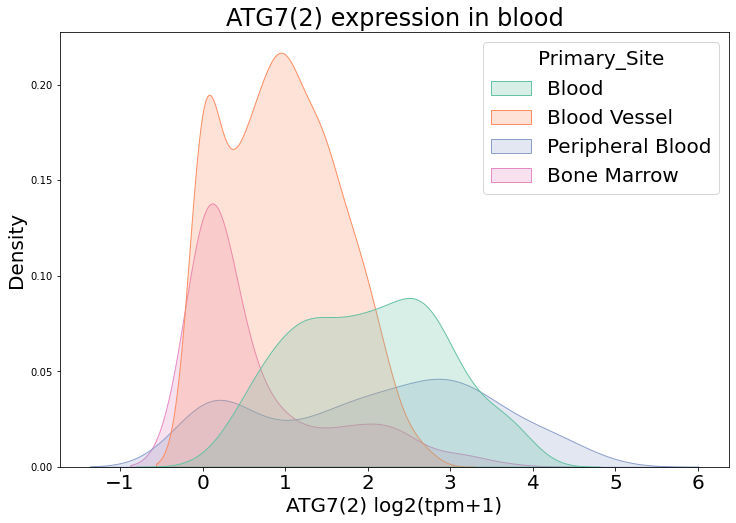

In [27]:
# Distribution graph, for ATG7, iso1 & iso2

isoforms = [['log2_p1_ATG7_total', 'ATG7'], 
            ['log2_p1_ATG7_1', 'ATG7(1)'], 
            ['log2_p1_ATG7_2', 'ATG7(2)']]

for isoform in isoforms:
    seaborn.kdeplot(data = df_all_blood, x= isoform[0],
                    hue="Primary_Site", palette = 'Set2', 
                    common_norm = True,
                    fill = True, legend=True)

    plt.xlabel(isoform[1]+ ' log2(tpm+1)')
    plt.title(isoform[1]+ ' expression in blood')
    plt.show()

## B) Percentage do not express ATG7 isoforms

In [28]:
#Percentage of patients: 
all_dfs = [[df_ATG7_Normal_blood, 'Blood'], [df_ATG7_Normal_Vessblood, 'Blood vessel'],
            [df_ATG7_Primary_periph, 'primary periph'], [df_ATG7_Primary_bonemarrow, 'primary bonemarrow']]

isoforms = [['ATG7_total', 'ATG7'], 
            ['ATG7_1tpm', 'ATG7(1)'], 
            ['ATG7_2tpm', 'ATG7(2)'],
            ['ATG7_3tpm', 'ATG7(3)']]

for df in all_dfs:
  print(df[1].upper())
  for isoform in isoforms:
        
    what = isoform[1]
    all_ = (df[0][isoform[0]]).shape
    no_exp = (df[0][isoform[0]]<0.1).sum()
    perc_no_exp = (no_exp*100)/all_
    perc_no_exp = float(perc_no_exp)

    print(round(perc_no_exp,1),'% of tumor do not express', what)
  print()


BLOOD
0.0 % of tumor do not express ATG7
0.0 % of tumor do not express ATG7(1)
0.3 % of tumor do not express ATG7(2)
11.0 % of tumor do not express ATG7(3)

BLOOD VESSEL
0.3 % of tumor do not express ATG7
0.3 % of tumor do not express ATG7(1)
17.2 % of tumor do not express ATG7(2)
55.1 % of tumor do not express ATG7(3)

PRIMARY PERIPH
0.0 % of tumor do not express ATG7
0.0 % of tumor do not express ATG7(1)
14.6 % of tumor do not express ATG7(2)
45.6 % of tumor do not express ATG7(3)

PRIMARY BONEMARROW
0.0 % of tumor do not express ATG7
0.0 % of tumor do not express ATG7(1)
41.8 % of tumor do not express ATG7(2)
76.8 % of tumor do not express ATG7(3)



In [29]:
#Percentage of patients: 
all_dfs = [[df_ATG7_Normal_blood, 'Blood'], [df_ATG7_Normal_Vessblood, 'Blood vessel'],
            [df_ATG7_Primary_periph, 'primary periph'], [df_ATG7_Primary_bonemarrow, 'primary bonemarrow']]

isoforms = [['ATG7_total', 'ATG7'], 
            ['ATG7_1tpm', 'ATG7(1)'], 
            ['ATG7_2tpm', 'ATG7(2)'],
            ['ATG7_3tpm', 'ATG7(3)']]

df_number_exp = []
what = []
sample_type = []
who_dontexp = []
perc_noexp = []
    
for df in all_dfs:
    for isoform in isoforms:
        #save the isoform name
        what.append(isoform[1])
        #save sample_type
        sample_type.append(df[1])
        #have the total sample number
        all_ = (df[0][isoform[0]]).shape
        #calculate number of sample who express the isoform
        without_exp = (df[0][isoform[0]]<0.1).sum()
        who_dontexp.append(without_exp)
        #convert result to percentage
        perc_without_exp = float((without_exp*100)/all_)   
        perc_noexp.append(round(perc_without_exp,1))

        #create a dictionnary and convert to dataframe
        d = dict(Isoforms = what, who_dontexp = who_dontexp, 
                 Percentage = perc_noexp, Sample_Type = sample_type)
        df_noexpr_distrib = pandas.DataFrame.from_dict(d, orient='index')
        df_noexpr_distrib = df_noexpr_distrib.T
          
df_noexpr_distrib

,Isoforms,who_dontexp,Percentage,Sample_Type
0,ATG7,0,0,Blood
1,ATG7(1),0,0,Blood
2,ATG7(2),1,0.3,Blood
3,ATG7(3),37,11,Blood
4,ATG7,2,0.3,Blood vessel
5,ATG7(1),2,0.3,Blood vessel
6,ATG7(2),104,17.2,Blood vessel
7,ATG7(3),334,55.1,Blood vessel
8,ATG7,0,0,primary periph
9,ATG7(1),0,0,primary periph


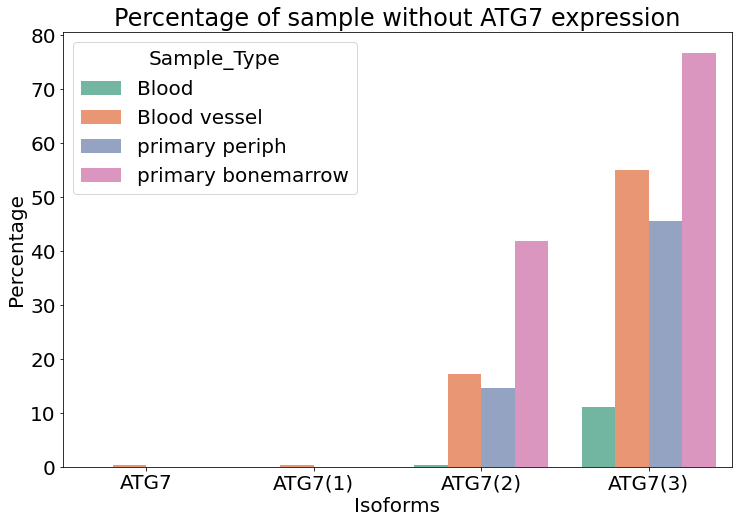

In [30]:
seaborn.barplot(data=df_noexpr_distrib, x="Isoforms", y="Percentage", hue="Sample_Type", 
                palette = 'Set2', orient = 'v')
plt.title("Percentage of sample without ATG7 expression")
plt.yticks(fontsize=20)

path = 'ATG7/blood/figs_ATG7_characterisation/'
plt.savefig(output_file_directory+path+'percentage_expression_blood.svg')

## C) Expression figures

### 1) Value TPM

In [31]:
df_all_blood

,sample,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_total,ATG7_1tpm,ATG7_2tpm,ATG7_3tpm,log2_p1_ATG7_total,log2_p1_ATG7_1,log2_p1_ATG7_2,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
0,GTEX-QCQG-0006-SM-2S1OW,Normal Tissue,Blood,5.7280,2.7440,3.822,2.486,53.001922,6.698252,1.414184e+01,5.601225e+00,5.754939,2.944531,3.920469e+00,26.441318,25.332519,53.483872,21.183609,0.126378,2.668175e-01
1,GTEX-PWN1-0006-SM-2S1NG,Normal Tissue,Blood,5.6800,2.9640,3.870,1.665,51.267472,7.801844,1.462030e+01,3.170137e+00,5.707841,3.137806,3.965351e+00,25.592283,30.485141,57.127779,12.387080,0.152179,2.851770e-01
2,GTEX-11NSD-0005-SM-5LZZ5,Normal Tissue,Blood,5.4100,2.4310,3.305,1.688,42.516946,5.391671,9.882349e+00,3.221097e+00,5.443505,2.676193,3.443918e+00,18.495117,29.151861,53.432206,17.415933,0.126812,2.324332e-01
3,GTEX-ZP4G-0006-SM-4WWE6,Normal Tissue,Blood,5.3900,3.0220,3.720,1.799,41.931589,8.121929,1.317646e+01,3.478789e+00,5.423968,3.189339,3.825425e+00,24.777174,32.779883,53.179818,14.040299,0.193695,3.142370e-01
4,GTEX-1497J-0005-SM-5NQBD,Normal Tissue,Blood,5.3810,2.9360,3.685,1.345,41.670814,7.651865,1.286062e+01,2.539302e+00,5.415178,3.113011,3.792919e+00,23.051783,33.194245,55.790113,11.015642,0.183626,3.086241e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,TARGET-20-PANINI-09,Primary Blood Derived Cancer,Bone Marrow,0.6239,-1.5520,-9.966,-9.966,1.540035,0.340037,-1.495113e-07,-1.495113e-07,1.344849,0.422273,-2.156992e-07,0.340037,100.000088,-0.000044,-0.000044,0.220798,-9.708303e-08
1415,TARGET-20-PATDHA-09,Primary Blood Derived Cancer,Bone Marrow,0.5370,-2.1140,-9.966,-9.966,1.449952,0.230006,-1.495113e-07,-1.495113e-07,1.292754,0.298665,-2.156992e-07,0.230005,100.000130,-0.000065,-0.000065,0.158630,-1.031146e-07
1416,TARGET-10-PARLAF-09,Primary Blood Derived Cancer,Bone Marrow,0.4340,-2.1780,-5.574,-9.966,1.349974,0.219982,1.999224e-02,-1.495113e-07,1.232645,0.286860,2.855818e-02,0.239974,91.669058,8.331004,-0.000062,0.162953,1.480935e-02
1417,TARGET-10-PASUBW-09,Primary Blood Derived Cancer,Bone Marrow,-0.1031,-0.4131,-9.966,-9.966,0.930030,0.750008,-1.495113e-07,-1.495113e-07,0.948623,0.807361,-2.156992e-07,0.750008,100.000040,-0.000020,-0.000020,0.806434,-1.607596e-07


### a. Only ATG7 (total)

In [90]:
# Distribution: Data preparation + graph
Data = df_all_blood
info = 'all tissue'

shape = Data.shape
shape = shape[0]
print(shape)

#select the sample type column
sample_type = {'primary_site':Data.iloc[:,2]}

#convert to df, and copy it 3 times
sample_typedf = pandas.DataFrame(sample_type)
sample_typedf = pandas.concat([sample_typedf,sample_typedf,sample_typedf])
sample_typedf.reset_index(drop=True, inplace=True)

# Y for expression value 
y = {'y':df_all_blood.iloc[:,7]}

#create df with Y 
data_distrib_t = pandas.DataFrame(y)
len(data_distrib_t)

# X for ATG7/iso1/iso2                              
data_distrib_t.loc[:shape,'x'] = 'ATG7'

# Will be used for Hue
data_distrib_t['Primary Site'] = sample_typedf['primary_site']
data_distrib_t

1419


,y,x,Primary Site
0,53.001922,ATG7,Blood
1,51.267472,ATG7,Blood
2,42.516946,ATG7,Blood
3,41.931589,ATG7,Blood
4,41.670814,ATG7,Blood
...,...,...,...
1414,1.540035,ATG7,Bone Marrow
1415,1.449952,ATG7,Bone Marrow
1416,1.349974,ATG7,Bone Marrow
1417,0.930030,ATG7,Bone Marrow


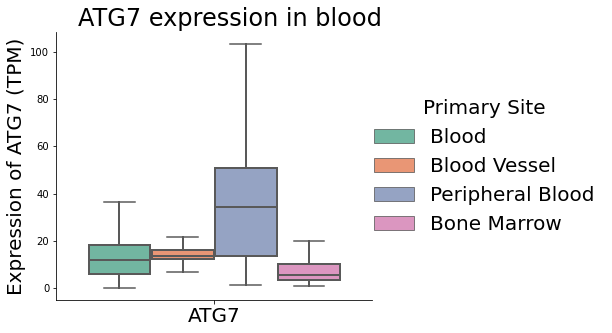

In [91]:
#graph
seaborn.catplot(x="x", y="y", hue="Primary Site", aspect= 1.2, kind="box", palette = 'Set2', 
                data = data_distrib_t, boxprops={'lw':2}, medianprops={'lw':2}, 
                whiskerprops={'lw':2}, showcaps=True, showfliers=False)

plt.ylabel('Expression of ATG7 (TPM)')
plt.xlabel('')
plt.title('ATG7 expression in blood', x=.55)

#save
path = 'ATG7/blood/figs_ATG7_characterisation/'
plt.savefig(output_file_directory+path+'ATG7_exp_allblood_atg7_tot.svg')

### b. ATG7(1) & ATG7(2)

In [92]:
# Distribution: Data preparation + graph
Data = df_all_blood
info = 'all blood tissue'

shape = Data.shape
shape = shape[0]
print(shape)

#select the sample type column
sample_type = {'primary_site':Data.iloc[:,2]}

#convert to df, and copy it 3 times
sample_typedf = pandas.DataFrame(sample_type)
sample_typedf = pandas.concat([sample_typedf,sample_typedf,sample_typedf])
sample_typedf.reset_index(drop=True, inplace=True)

# Y for expression value 
y = {'y':[Data.iloc[:,j][i]
  for j in range(8,10)
    for i in range(0, shape)]}

#create df with Y 
data_distrib = pandas.DataFrame(y)

# X for ATG7/iso1/iso2                              
data_distrib.loc[:shape,'x'] = 'ATG7(1)'
data_distrib.loc[shape: shape*2,'x'] = 'ATG7(2)'

# Will be used for Hue
data_distrib['Primary Site'] = sample_typedf['primary_site']
data_distrib

1419


,y,x,Primary Site
0,6.698252e+00,ATG7(1),Blood
1,7.801844e+00,ATG7(1),Blood
2,5.391671e+00,ATG7(1),Blood
3,8.121929e+00,ATG7(1),Blood
4,7.651865e+00,ATG7(1),Blood
...,...,...,...
2833,-1.495113e-07,ATG7(2),Bone Marrow
2834,-1.495113e-07,ATG7(2),Bone Marrow
2835,1.999224e-02,ATG7(2),Bone Marrow
2836,-1.495113e-07,ATG7(2),Bone Marrow


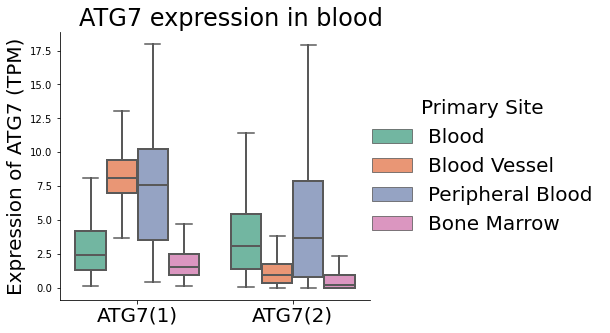

In [93]:
#graph
seaborn.catplot(x="x", y="y", hue="Primary Site", aspect= 1.2, kind="box", palette = 'Set2', data = data_distrib, 
              boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

plt.ylabel('Expression of ATG7 (TPM)')
plt.xlabel('')
plt.title('ATG7 expression in blood', x=.55)

#save
path = 'ATG7/blood/figs_ATG7_characterisation/'
plt.savefig(output_file_directory+path+'ATG7_exp_allblood_iso1_2.svg')

In [ ]:
#Distribution: Stats for all 




In [94]:
#median brut file to compare 
print(df_all_blood['ATG7_total'].mean())
print(df_all_blood['ATG7_1tpm'].mean())
print(df_all_blood['ATG7_2tpm'].mean())

16.826558264551256
5.696372228494358
2.4699803936641787


In [95]:
#median after modification to be sure I selected the good ones
data_distribtest = data_distrib_t[data_distrib_t['x'] == 'ATG7']
data_distribtest1 = data_distrib[data_distrib['x'] == 'ATG7(1)']
data_distribtest2 = data_distrib[data_distrib['x'] == 'ATG7(2)']
print(data_distribtest.mean())
print(data_distribtest1.mean())
print(data_distribtest2.mean())

y    16.826558
dtype: float64
y    5.696372
dtype: float64
y    2.46998
dtype: float64


### 2) Normalized

In [105]:
# NORMALiZED Distribution: Data preparation + graph
# Distribution: Data preparation + graph
Data = df_all_blood
info = 'all blood tissue'

shape = Data.shape
shape = shape[0]
print(shape)

#select the sample type column
sample_type = {'primary_site':[Data.iloc[:,2][i]
  for i in range(0, shape)]}

#convert to df, and copy it 3 times
sample_typedf = pandas.DataFrame(sample_type)
sample_typedf = pandas.concat([sample_typedf,sample_typedf,sample_typedf])
sample_typedf.reset_index(drop=True, inplace=True)

# Y for expression value 
y = {'y':[Data.iloc[:,j][i]
  for j in range(18,20)
    for i in range(0, shape)]}

#create df with Y 
data_distrib = pandas.DataFrame(y)

# X for ATG7/iso1/iso2                              
data_distrib.loc[:shape,'x'] = 'ATG7(1)/ATG7'
data_distrib.loc[shape:,'x'] = 'ATG7(2)/ATG7'

# Will be used for Hue
data_distrib['Primary Site'] = sample_typedf['primary_site']
data_distrib

1419


,y,x,Primary Site
0,1.263775e-01,ATG7(1)/ATG7,Blood
1,1.521792e-01,ATG7(1)/ATG7,Blood
2,1.268123e-01,ATG7(1)/ATG7,Blood
3,1.936948e-01,ATG7(1)/ATG7,Blood
4,1.836265e-01,ATG7(1)/ATG7,Blood
...,...,...,...
2833,-9.708303e-08,ATG7(2)/ATG7,Bone Marrow
2834,-1.031146e-07,ATG7(2)/ATG7,Bone Marrow
2835,1.480935e-02,ATG7(2)/ATG7,Bone Marrow
2836,-1.607596e-07,ATG7(2)/ATG7,Bone Marrow


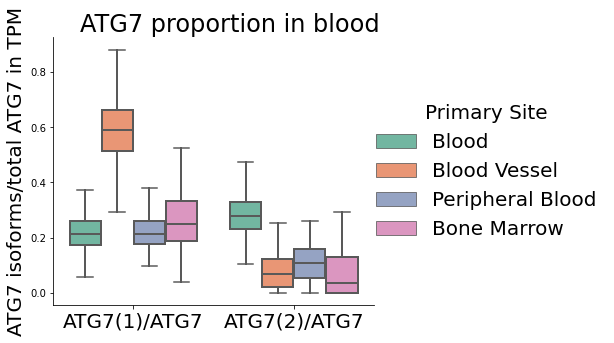

In [107]:
#graph
seaborn.catplot(x="x", y="y", hue="Primary Site", aspect= 1.2, kind="box", palette = 'Set2', data = data_distrib, 
              boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

plt.ylabel('ATG7 isoforms/total ATG7 in TPM')
plt.xlabel('')
plt.title('ATG7 proportion in blood', x=0.55)

#save
path = 'ATG7/blood/figs_ATG7_characterisation/'
plt.savefig(output_file_directory+path+'ATG7_exp_allblood_iso1_2normalized.svg')

In [ ]:
#NORMALIZED Distribution: Stats for all 

# IV] Expression correlation 

## 1) between the two isoforms

In [134]:
#Remove the 0.5% extremities to have a nicer graph
tissues = [[df_ATG7_Normal_blood, 'Blood'], [df_ATG7_Normal_Vessblood, 'Blood vessel'],
            [df_ATG7_Primary_periph, 'primary periph'], [df_ATG7_Primary_bonemarrow, 'primary bonemarrow']]

isoforms = ['ATG7_1', 'ATG7_2']
df_final = []

for tissue in tissues:
 
    #Remove 0.5% extremities
    df_no_extrem = []
    for isoform in isoforms:
        print(tissue[1], ':', tissue[0].shape)
        #sort by value, 
        for_isoforms = tissue[0].sort_values([isoform], ascending = False)
        print(isoform)
        
        #remove the extremities
        lenght = len(for_isoforms)
        without_05perc = int(lenght*0.005)
        print('', without_05perc, 'are removed from head and tail')
        without_head = without_05perc
        without_tail = lenght - without_05perc
                
        df_no_extremities = for_isoforms.iloc[without_head:without_tail,:]
        print(' without extremities:', df_no_extremities.shape)
        print()
        df_no_extrem.append(df_no_extremities)
        
    #drop the unfiltered column ATG7_2 ([0]) and replace it with the filtered one ([1]) 
    df_no_extrem[0].pop("ATG7_2")
    #add column ATG7_2 (filtered one) at the correct position
    df_no_extrem[0].insert(5, "ATG7_2", df_no_extrem[1]['ATG7_2'])
    #remove NaN (the deleted samples for the two isoform)
    df = df_no_extrem[0].dropna(axis=0)
    df_final.append(df)
    print('df_final after merge of the two filtered columns:', df.shape)
    print('________________________')
    #now, need to compute the two isoform with sample name.

Blood : (337, 20)
ATG7_1
 1 are removed from head and tail
 without extremities: (335, 20)

Blood : (337, 20)
ATG7_2
 1 are removed from head and tail
 without extremities: (335, 20)

df_final after merge of the two filtered columns: (334, 20)
________________________
Blood vessel : (606, 20)
ATG7_1
 3 are removed from head and tail
 without extremities: (600, 20)

Blood vessel : (606, 20)
ATG7_2
 3 are removed from head and tail
 without extremities: (600, 20)

df_final after merge of the two filtered columns: (596, 20)
________________________
primary periph : (239, 20)
ATG7_1
 1 are removed from head and tail
 without extremities: (237, 20)

primary periph : (239, 20)
ATG7_2
 1 are removed from head and tail
 without extremities: (237, 20)

df_final after merge of the two filtered columns: (235, 20)
________________________
primary bonemarrow : (237, 20)
ATG7_1
 1 are removed from head and tail
 without extremities: (235, 20)

primary bonemarrow : (237, 20)
ATG7_2
 1 are removed fro

The correlation between iso1 and iso2 in blood is: 0.8540307156282766 3.0472238758384416e-96


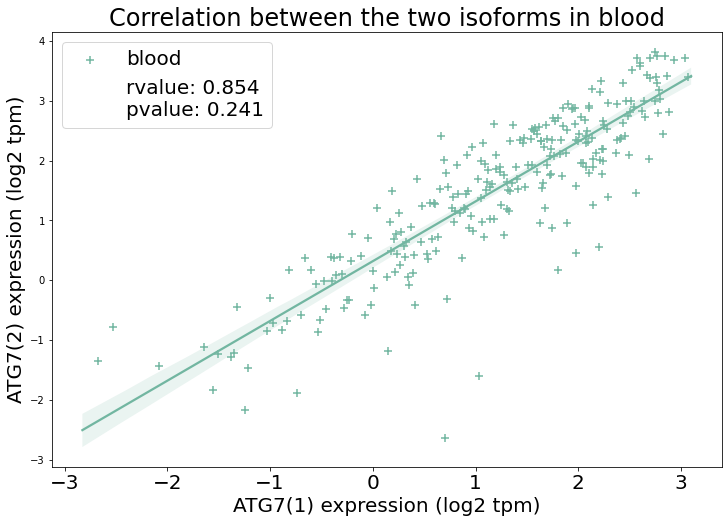


The correlation between iso1 and iso2 in vessel is: -0.40992238971428924 1.4778025270937854e-25


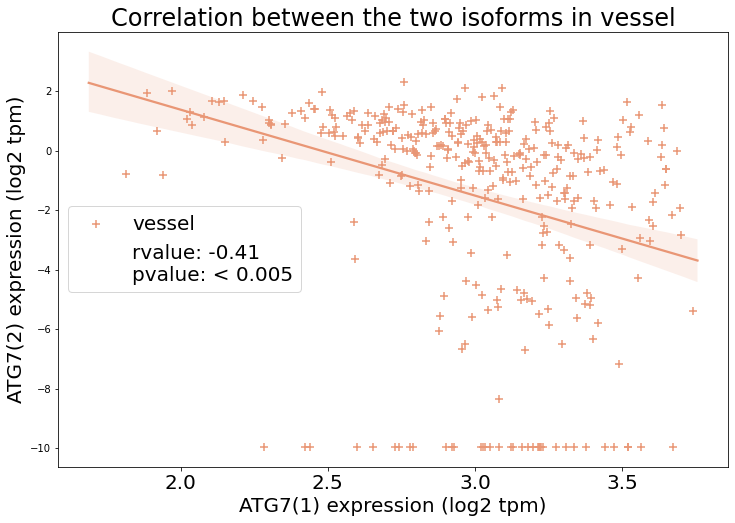


The correlation between iso1 and iso2 in primary_periph is: 0.8018156936152147 5.14668392532096e-54


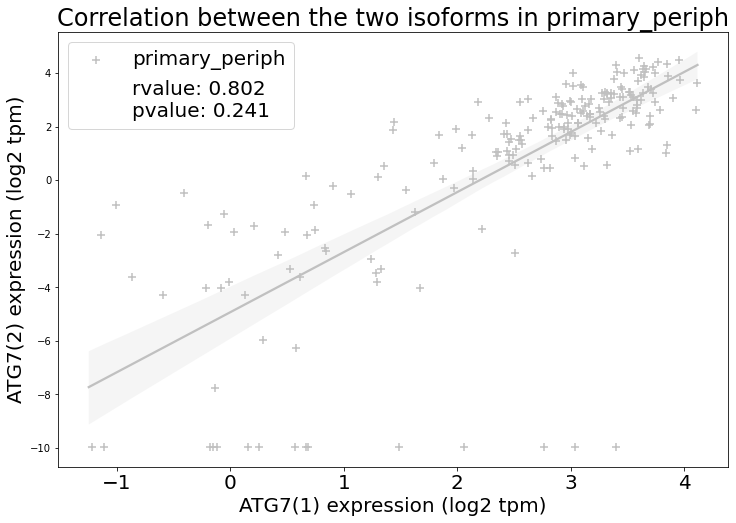


The correlation between iso1 and iso2 in primary_bone_marrow is: 0.4490603773493695 5.797875928821762e-13


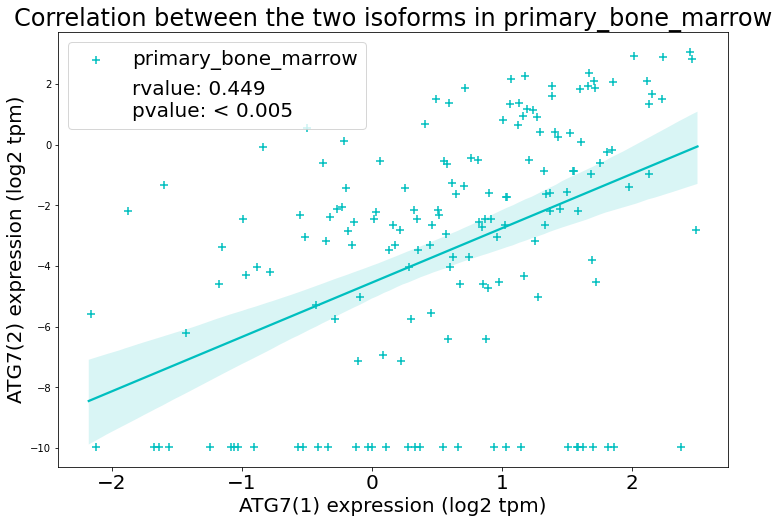

<Figure size 864x576 with 0 Axes>

In [138]:
#Graph and stats_ spearman correlation
#graph
df_final
color1 = '#72B6A1'
color2 = '#e99675'

blood_tissue = [df_final[0], "blood", '0.241', color1]
vessel_b_tissue = [df_final[1], "vessel", "< 0.005", color2]
primary_periph = [df_final[2], "primary_periph", '0.241', 'silver']
primary_bone_marrow = [df_final[3], "primary_bone_marrow", "< 0.005", 'c']

tissues_no_extrem = blood_tissue, vessel_b_tissue, primary_periph, primary_bone_marrow

for tissue in tissues_no_extrem:
    #remove Survival information
    x = tissue[0]['ATG7_1'].to_list()
    y = tissue[0]['ATG7_2'].to_list()    
    
    #stat Spearman correlation 
    r_value, p_value = scipy.stats.spearmanr(x, y)
    print("The correlation between iso1 and iso2 in",tissue[1],"is:", r_value, p_value)
    
    #graph
    seaborn.regplot(x=x,y=y, x_bins=800, x_ci = 0, marker="+", label = tissue[1], color = tissue[3])
    seaborn.regplot(x=[],y=[], marker=" ", label= 'rvalue: '+str(round(r_value,3))+ "\npvalue: "+str(tissue[2]))

    name = "Correlation between the two isoforms in " + tissue[1]
    plt.title(name)
    plt.xlabel("ATG7(1) expression (log2 tpm)")
    plt.ylabel('ATG7(2) expression (log2 tpm)')

    plt.legend()

    #save
    path = 'ATG7/figs_ATG7_characterisation/'
    title_file = 'ATG7s_corr_' + tissue[1]
#     plt.savefig(output_file_directory+path+title_file+'.svg')

    plt.show()  
    plt.clf()
    print()